# Read Data

First, we read the csv file as a Pnadas dataframe. The dataset is available on Kaggle


In [38]:
import pandas as pd
import numpy as np
black_friday_data = pd.read_csv("BlackFriday.csv")
black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


There are some missing values. Let's find out which columns have missing values and how many of them are there

In [39]:
for column_name in black_friday_data.columns:
    missing_value = black_friday_data[column_name].isnull().sum()
    print(column_name, missing_value)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 166986
Product_Category_3 373299
Purchase 0


We will have to take this in consideration in our feature engineering phase. If we intend to keep these columns however, then we need to replace the missing values by something our **deep nerual network can recognize**. Since both columns represent categorical data, we can create a new category that represent missing values.

As you can see these columns represent their categories using integer values. Let's examine how many categories are there

In [40]:
unique_categories = []
for col_name in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    unique_categories += list(black_friday_data[col_name].unique())
set(unique_categories)

{nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, nan}

Looks like the categories start at 1, so we can use 0 to represent missing information

In [41]:
black_friday_data['Product_Category_2'].fillna(0, inplace=True)
black_friday_data['Product_Category_3'].fillna(0, inplace=True)
black_friday_data['Gender'].replace(('M', 'F'), (1, 0), inplace=True)

black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


# Deep neural network 




### one-hot encoding

use one-hot encoding on categorical data so it would be eaiser for nerual network  to find correlation, nerual network  require numerical input and output variables

In [42]:
data = black_friday_data

dummy_fields = [ 'City_Category','Stay_In_Current_City_Years','Age']
for each in dummy_fields:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

fields_to_drop = ['User_ID','Product_ID', 'City_Category','Stay_In_Current_City_Years','Age']
data = data.drop(fields_to_drop, axis=1)
data.head()


,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,10,0,3,0.0,0.0,8370,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,10,0,1,6.0,14.0,15200,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,10,0,12,0.0,0.0,1422,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,10,0,12,14.0,0.0,1057,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,16,0,8,0.0,0.0,7969,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Normalize Data
Reduce differences in the ranges of values,to make training faster .

For **Purchase** standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

For the rest, we divide on the max number so the value be between 0 to 1

In [43]:
mean, std = data["Purchase"].mean(), data["Purchase"].std()
data.loc[:, "Purchase"] = (data["Purchase"] - mean)/std

data["Product_Category_1"] = data["Product_Category_1"] / 18
data["Product_Category_2"] = data["Product_Category_2"] / 18
data["Product_Category_3"] = data["Product_Category_3"] / 18
data["Occupation"] = data["Occupation"] / 20

data.head()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0.5,0,0.166667,0.000000,0.000000,-0.193506,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0.5,0,0.055556,0.333333,0.777778,1.177698,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0.5,0,0.666667,0.000000,0.000000,-1.588401,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0.5,0,0.666667,0.777778,0.000000,-1.661679,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0.8,0,0.444444,0.000000,0.000000,-0.274012,0,0,1,...,0,0,1,0,0,0,0,0,0,1


### Splitting the data into training, testing, and validation sets

We'll save approximately 40% data as validation and test set after we've trained the network. We'll use this set to make predictions and compare them with the actual numbers.

Then Separate the data into features and targets.



In [44]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train, validation = train_test_split(train, test_size=0.2)


target_fields = ['Marital_Status']

train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]
validation_features, validation_targets = validation.drop(target_fields, axis=1), validation[target_fields]
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]

### Import the deep learning libraries

Keras is a high level API built on TensorFlow, to build and test a neural network with minimal lines of code

In [45]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation


### Time to build the network

The network has three layers, two hidden layer and one output layer. The hidden layers will use the sigmoid function for activations.the first hidden layers 32 neural and the second hidden layers has 16 neural.

The output layer has only one node and is used for the classification **zero or one** so it also will use sigmoid function, the activation function is $f(x)=(1/(1 + \exp(-x)))$. 

I Use **binary_crossentropy** because every output is independent, not mutually exclusive and can take values 0 or 1 
Hy′(y):=−∑iy′ilog(yi) yi is the predicted probability value for class i and y′i is the true probability for that class.

The **Adam optimization** algorithm is an extension to stochastic gradient descent to update network weights iterative based in training data.
It has many benefits but what I need is Appropriate for problems with very noisy/or sparse gradients, Well suited for problems that are large in terms of data and/or parameters and Little memory requirements.

The method computes individual **adaptive learning rates** for different parameters from estimates of first and second moments of the gradients.


In [58]:
model = Sequential()
model.add(Dense(32, input_dim=train_features.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(16, input_dim=train_features.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                704       
_________________________________________________________________
activation_39 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_40 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
_________________________________________________________________
activation_41 (Activation)   (None, 1)                 0         
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(train_features, train_targets, epochs=50,  validation_data=(validation_features, validation_targets), verbose=1)


Train on 344048 samples, validate on 86013 samples
Epoch 1/50
344048/344048 [==============================] - 27s 80us/step - loss: 0.6080 - acc: 0.6688 - val_loss: 0.6046 - val_acc: 0.6706
Epoch 2/50
344048/344048 [==============================] - 28s 81us/step - loss: 0.6039 - acc: 0.6705 - val_loss: 0.6005 - val_acc: 0.6742
Epoch 3/50
344048/344048 [==============================] - 31s 90us/step - loss: 0.5996 - acc: 0.6752 - val_loss: 0.5952 - val_acc: 0.6794
Epoch 4/50
344048/344048 [==============================] - 26s 75us/step - loss: 0.5950 - acc: 0.6792 - val_loss: 0.5902 - val_acc: 0.6801
Epoch 5/50
344048/344048 [==============================] - 25s 72us/step - loss: 0.5898 - acc: 0.6813 - val_loss: 0.5843 - val_acc: 0.6830
Epoch 6/50
344048/344048 [==============================] - 30s 87us/step - loss: 0.5848 - acc: 0.6827 - val_loss: 0.5799 - val_acc: 0.6872
Epoch 7/50
344048/344048 [==============================] - 31s 90us/step - loss: 0.5807 - acc: 0.6849 - val_

In [63]:
score = model.evaluate(test_features, test_targets)
print("\nAccuracy: ", score[-1])


107516/107516 [==============================] - 3s 25us/step

Accuracy:  0.7404479333375056


In [65]:
# list all data in history
print(history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


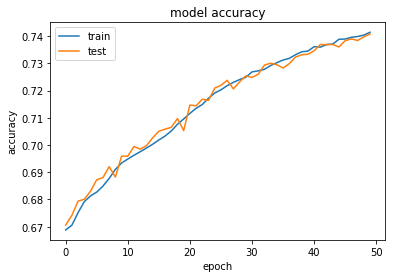

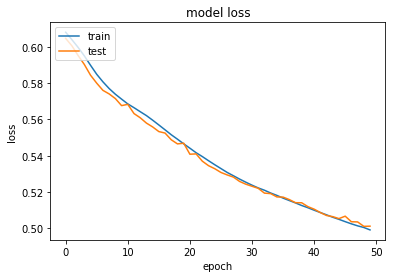

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Random forest

is a powerful method for regression and classification.

The random forest method makes use of several trees when making its prediction, and since in graph theory, a collection of trees is called a forest, in other words, to make a prediction, the random forest considers the predictions of several trees. It would not, however, be useful to have many identical trees because all these trees would presumably give you the same prediction, this is why the trees in the forest are randomized.

Tree-based methods can be used for regression and classification, these methods involve dividing the predictor space into simpler regions using straight lines,so we first take the entire predictor space and divide it into two regions. We now in turn look at each of these two smaller regions, divide them into yet smaller regions, and so on, continuing until we hit some stopping criteria.

So the way we divide the predictor space into smaller regions is recursive in nature,to make a prediction for a previously unseen test observation, we find the region of the predictor space where the test observation falls. In the regression setting, we return the mean of the outcomes of the training observations in that particular region, whereas in a classification setting we return the mode, the most common element of the outcomes of the training observations in that region.

When we use lines to divide the predictor space into regions, these lines must be aligned with the directions of the axes of the predictor space, and because of this constraint, we can summarize the splitting rules in a tree.

This is also why these methods are known as decision tree methods. In higher dimensions, these lines become planes,so we end up dividing the predictor space into high-dimensional rectangles or boxes.

How do we decide where to make these cuts? The basic idea is that we'd like to carve out regions in the predictor space that are maximally homogeneous in terms of their outcomes. Remember, we'll ultimately use the mean or the mode of the outcomes falling in a given region as our predicted outcome for an unseen observation, so we can minimize error by finding maximally homogeneous regions in the predictor space. Whenever we make a split, we consider all predictors from x1 to xp, and for each predictor, we consider all possible cut points. We choose the predictor - cut point combination such that the resulting division of the predictor space has the lowest value of some criterion, usually called a loss function, that we're trying to minimize. In regression, this loss function is usually RSS, the residual sum of squares. In classification, two measures are commonly used, called the Gini index and the cross-entropy, the basic idea is, again, to make cuts using a predictor cut point combination that makes the classes within each region as homogeneous as possible.

Bagging, in the context of decision trees, means that we draw a number of bootstrap datasets and fit each to a tree.rest

Let's consider a simple example, We start from some dataset having 1,000 observations, and we have 9 predictors from x1 through x9. We want to build, say, 50 trees, so let's randomize the data first, We first draw 50 bootstrap samples from the original data and dedicate a separate tree for each dataset. We then fit the trees one by one. Starting from the first tree and the first cut, we first determine which predictors to use. If we're allowed to use, say, three predictors when making a cut, we might be allowed to use x3, x7, and, say, x8 for the first cut. We make the best cut we can given the data and these three predictors, and we then move the second cut in the first tree. This time we might be allowed to use predictors x1, x5, and x7. And again, we find the best cut.We proceed until we fit the first three, meaning until we fit whatever stopping criterion we have, We then continue the same way until we get all of the trees in the forest.

For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation)."Integer Encoding"

###  Integer Encoding

Use **LabelEncoder** to transfer our data to integer valuse 

In [73]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df = black_friday_data.apply(LE.fit_transform)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,670,0,0,10,0,2,0,2,0,0,6583
1,0,2374,0,0,10,0,2,0,0,5,11,11992
2,0,850,0,0,10,0,2,0,11,0,0,473
3,0,826,0,0,10,0,2,0,11,13,0,381
4,1,2732,1,6,16,2,4,0,7,0,0,6182


### Splitting the data into training, testing, and validation sets

We'll save approximately 20% data as test set after we've trained the network. We'll use this set to make predictions and compare them with the actual numbers.

Then Separate the data into features and targets.

In [74]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df , test_size=0.2)

target_fields = ['Marital_Status']

train_features, train_targets = train.drop(target_fields, axis=1), train[target_fields]
test_features, test_targets = test.drop(target_fields, axis=1), test[target_fields]

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_features, train_targets)


As you can see it gives us high Accuracy.

In [76]:
print("As you can see it gives us high Accuracy Score of Random Forests on test set",clf.score(test_features, test_targets)*100)


Accuracy Score of Random Forests on test set 98.56486476431415


#  Naive Bayes Classifier

The Naive Bayes Classifier technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high like in our case. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.


To demonstrate the concept of Naïve Bayes Classification.
As indicated, the objects can be classified as either **single or married**. Our task is to classify new cases as they arrive, decide to which class label they belong, based on the currently exiting objects.

Since there are more as many **single** objects as **married**, it is reasonable to believe that a new case (which hasn't been observed yet) is more as likely to have membership **single** rather than **married**. In the Bayesian analysis, this belief is known as the prior probability. Prior probabilities are based on previous experience, in this case the percentage of **single or married** objects, and often used to predict outcomes before they actually happen.



In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [78]:
model = GaussianNB()


model.fit(train_features, train_targets)

predicted_labels = model.predict(test_features)

print ("FINISHED classifying. accuracy score : ",accuracy_score(test_targets, predicted_labels))

/Users/owner/anaconda3/envs/black_env/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FINISHED classifying. accuracy score :  0.668523754603966
